<a href="https://colab.research.google.com/github/bruh7463/data_mining_project_team_14/blob/main/data_mining_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
  <font size=6><b>CSC 4792: Data Mining and Warehousing</b></font><br />
  <font size=3>Group Project: Classify country of origin for Wikipedia user contributions on Zambian Wikipedia pages</font>

   <b>Group Members</b> </br>
   Simon Chanda </br>
   Lawrence Chitandula </br>
   Chilufya Chulu </br>
   Kasweka Michael Mukoko </br>
   Mike Shatamuka </br>
</center>


# **1. Business Understanding**
### Problem Statement
Wikipedia pages related to Zambia have fewer local contributions than international ones. There is little understanding of where the contributors of Zambian-related pages come from, including the Zambia page. Without this information, it is difficult to create specific strategies that boost contributions from Zambian Wikipedians. The goal is to find out and categorize the origins of Wikipedia users who contribute to Zambian pages. This will help in planning actions that promote more local involvement.

### Business Objectives
- Identify the percentage of contributions to Zambian Wikipedia articles by users from Zambia compared to other nations.
- Provide practical advice to guide strategies for Zambian-based contributions.
- Support The University of Zambia's DataLab Research Group in advocating for greater representation of local perspectives on Wikipedia.
- Enable long-term monitoring of contribution by country of origin.

### What Success Looks Like In Practice
- An unambiguous evidence based report on the contributions by country.
- It was possible to identify trends of where most of edits are made.
- Lessons that could be shared with Wikimedia communities and policymakers incase of encouraging locals to contribute.

### Data Mining Goals
- Create a prediction model that can determine the most likely country of origin for each Wikipedia edit made to Zambian pages, using details like the user’s IP address (for anonymous edits), profile information, and the timing of edits.

- Analyze and visualize the data to show clear summaries of how contributions are distributed by country.

- Spot unusual trends or activity, such as sudden increases in edits coming from a specific country.

### Initial Project Success Criteria

- Produce a clear and accurate breakdown of Wikipedia contributions to Zambian pages by country of origin.
- Achieve at least 80% accuracy in classifying the country of origin for contributions.
- Visualize contribution patterns and trends over time through interpretable dashboards or charts.
- Provide actionable insights that can guide strategies to increase local Zambian participation.



# **2. Data Understanding**

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load CSV
file_path = "/content/drive/MyDrive/Dataset/zambia_wikipedia_history.csv"
df = pd.read_csv(file_path)

# Preview dataset
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (528, 10)


,page_id,title,rev_id,timestamp,contributor_id,contributor_name,contributor_ip,comment,minor,text_length
0,15643,Zambia,66041,2005-10-31T08:48:31Z,NaN,"User(id=1734, text='Ianleow7')",NaN,Creating article.,False,1617
1,15643,Zambia,66727,2005-11-05T06:07:50Z,NaN,"User(id=1110, text='Ricky81682')",NaN,rm unused cat,False,1577
2,15643,Zambia,100931,2006-02-14T12:33:52Z,NaN,"User(id=None, text='81.204.151.102')",NaN,NaN,False,2211
3,15643,Zambia,100964,2006-02-14T15:58:40Z,NaN,"User(id=2131, text='Archer7')",NaN,corrected formatting,False,2219
4,15643,Zambia,100987,2006-02-14T16:17:15Z,NaN,"User(id=2077, text='Freshstart')",NaN,"typos, full names",True,2273


- The dataset contains 528 rows and 10 columns.

- First look shows columns like: title, rev_id, timestamp, contributor, text_length.

- Data seems to have both text and numeric attributes.

In [ ]:
# [DU] Lawrence — Dataset Info and Descriptive Statistics

# Show dataset structure
df.info()

# Show summary statistics
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           528 non-null    int64  
 1   title             528 non-null    object 
 2   rev_id            528 non-null    int64  
 3   timestamp         528 non-null    object 
 4   contributor_id    0 non-null      float64
 5   contributor_name  528 non-null    object 
 6   contributor_ip    0 non-null      float64
 7   comment           422 non-null    object 
 8   minor             528 non-null    bool   
 9   text_length       528 non-null    int64  
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 37.8+ KB


,page_id,title,rev_id,timestamp,contributor_id,contributor_name,contributor_ip,comment,minor,text_length
count,5.280000e+02,528,5.280000e+02,528,0.0,528,0.0,422,528,528.000000
unique,NaN,42,NaN,522,NaN,168,NaN,355,2,NaN
top,NaN,Zambia,NaN,2022-07-17T04:33:46Z,NaN,"User(id=248920, text='TDKR Chicago 101')",NaN,/* Officeholders */,False,NaN
freq,NaN,210,NaN,4,NaN,39,NaN,13,297,NaN
mean,4.750467e+05,NaN,5.879362e+06,NaN,NaN,NaN,NaN,NaN,NaN,5516.217803
std,4.397492e+05,NaN,3.352194e+06,NaN,NaN,NaN,NaN,NaN,NaN,4755.556816
min,1.564300e+04,NaN,6.604100e+04,NaN,NaN,NaN,NaN,NaN,NaN,20.000000
25%,1.564300e+04,NaN,2.756411e+06,NaN,NaN,NaN,NaN,NaN,NaN,2515.250000
50%,4.398810e+05,NaN,7.017644e+06,NaN,NaN,NaN,NaN,NaN,NaN,3876.500000
75%,8.640472e+05,NaN,8.389734e+06,NaN,NaN,NaN,NaN,NaN,NaN,7183.000000


- The dataset contains **528 rows** and **10 columns**.  
- The **`contributor_id`** and **`contributor_ip`** columns have **100% missing values** (no records available).  
- The **`timestamp`** column is stored as an object type and needs conversion to datetime for proper time-based analysis.  
- The **`text_length`** column is complete for all entries and shows variation in article sizes.  
- Some categorical columns, such as **`title`** and **`contributor_name`**, have high cardinality (many unique values).  


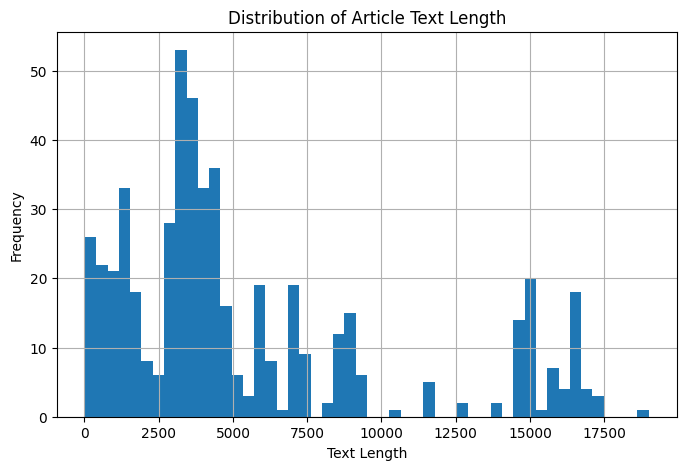

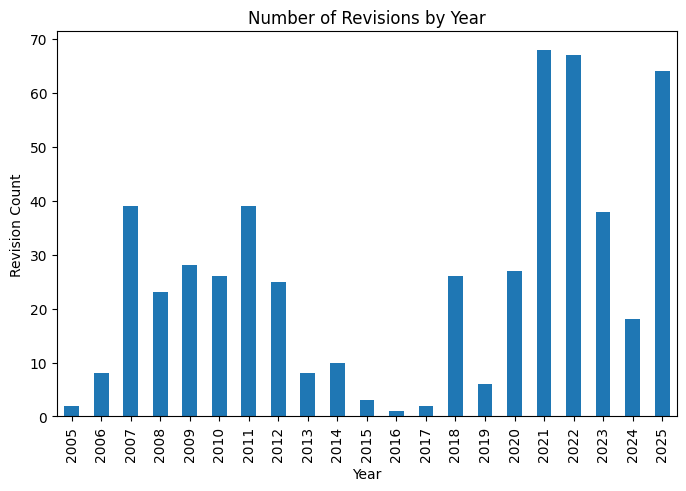

In [13]:
# [DU] Mike - Numerical Visualizations
import matplotlib.pyplot as plt

# Convert timestamp to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

# Histogram of text length
plt.figure(figsize=(8,5))
df["text_length"].hist(bins=50)
plt.title("Distribution of Article Text Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

# Revisions by year
plt.figure(figsize=(8,5))
df["timestamp"].dt.year.value_counts().sort_index().plot(kind="bar")
plt.title("Number of Revisions by Year")
plt.xlabel("Year")
plt.ylabel("Revision Count")
plt.show()

* Text length distribution is skewed with most articles having fewer than 17500 characters.
* Revision activity peaked around 2021 to 2022.
* Outliers exist with large text lengths.